<a href="https://colab.research.google.com/github/ShriDharshana25/project1/blob/main/RealEstatePrice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                              REAL ESTATE PRICE PREDICTION


Objective

---



Develop a robust machine learning model for real estate price prediction, leveraging historical property data and relevant market indicators. Enhance accuracy by incorporating advanced statistical techniques and feature engineering. Optimize the model's performance through thorough validation and testing, aiming to provide reliable and actionable predictions for property valuation. Facilitate informed decision-making for buyers, sellers, and investors in the dynamic real estate market.

Data Source

---



Utilising a comprehensive historical property sales data from reliable databases and integrate relevant macroeconomic indicators, ensuring a robust dataset for accurate real estate price predictions.

Import Library

---



In [37]:
#import library
import pandas as pd

Import Data

---



In [38]:
#import data
Estate_price=pd.read_csv('https://github.com/Vinayak409/Real-estate-price-prediction/raw/master/Real%20estate.csv')

Describe Data

---



In [39]:
Estate_price.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [40]:
Estate_price.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [41]:
Estate_price.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [42]:
Estate_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [43]:
Estate_price.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

Data Visualization

---



In [44]:

import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-45-b11a519f9659>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Estate_price['Y house price of unit area'], color='blue')


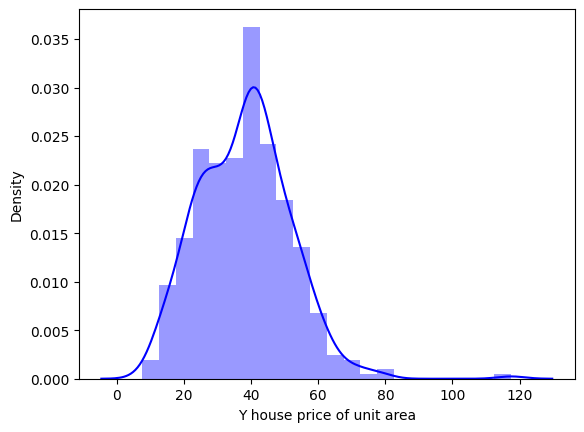

In [45]:
sns.distplot(Estate_price['Y house price of unit area'], color='blue')
plt.show()

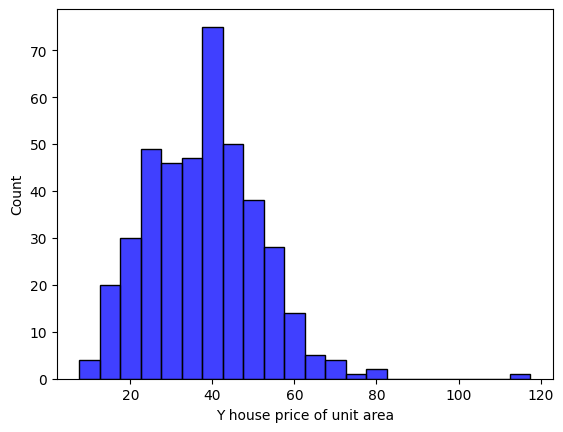

In [46]:
sns.histplot(Estate_price['Y house price of unit area'], color='blue')
plt.show()

Data Preprocessing

---



*There is no missing data-value in dataset*

Define Target Variable (y) and Feature Variables (X)

---



In [47]:
#define target variable(y) and feature variable(x)
y =Estate_price['Y house price of unit area']
x =Estate_price.drop(['No','Y house price of unit area'],axis=1)

Train Test Split

---



In [48]:
#train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2529)

Modeling

---



In [49]:
#select model
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [50]:
#train model(fir model)
model.fit(x_train,y_train)

LinearRegression()

Model Evaluation

---




In [51]:
model.intercept_

-13641.335531664932

In [52]:
model.coef_

array([ 4.87678865e+00, -2.93959837e-01, -4.36858449e-03,  1.20593924e+00,
        1.93224175e+02, -7.88339683e+00])

Prediction

---



In [53]:
y_pred=model.predict(x_test)
y_pred

array([35.4633826 , 53.38928626, 49.97781888, 46.05509476, 37.88880026,
       48.12554232, 47.8096865 , 31.41906389, 24.67379843, 46.18279308,
       48.34468526, 44.28369421, 45.39179312, 34.07359712, 46.09306415,
       36.65861092, 29.42725754, 44.48415843, 32.54906839, 41.76184541,
       36.87716133, 50.37099613, 36.27182388, 52.9109463 , 48.1506115 ,
       14.40359763, 40.95311032, 46.68288173, 33.01421089, 36.67114089,
       48.12554232, 45.84125717, 43.88728536, 14.40472775,  9.30160045,
       28.37883943, 12.40218011, 29.94099552, 37.94009326, 47.39985655,
       27.22308883, 38.96885506, 42.30796536, 46.27648248, 43.61901083,
       30.93364423, 47.64107817, 37.49860599, 40.06289972, 44.22133371,
       43.7040075 , 54.47316333, 27.20360818, 46.82054743, 33.86599246,
       34.20908383, 34.45243642, 44.36442775, 34.43059702, 35.40144715,
       39.44756867, 43.72416795, 31.86836999, 41.7126449 , 45.58428925,
       36.15784453, 31.61872985, 41.77406657, 40.42824369, 37.06

Accuracy

---



In [54]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.15814417809021114

In [55]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)


60.91161631186144

Explanation

---





From the above prediction and mean absolute percentage error, the accuracy of this real estate price prediction is 84.19 %
Accuracy => 100 % - 15.81% = 84.19 %